# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy.constants import convert_temperature

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print(cities)

['vaini', 'temyasovo', 'kruisfontein', 'port elizabeth', 'nizhneyansk', 'qaanaaq', 'rikitea', 'longyearbyen', 'hilo', 'manggar', 'mys shmidta', 'punta arenas', 'cherskiy', 'ushuaia', 'albany', 'jishou', 'faanui', 'khandyga', 'carnarvon', 'petropavlovsk-kamchatskiy', 'busselton', 'chicama', 'jamestown', 'port alfred', 'tuatapere', 'sisimiut', 'nikolskoye', 'mataura', 'tidore', 'wembley', 'tuktoyaktuk', 'yellowknife', 'east london', 'dekar', 'puerto escondido', 'kloulklubed', 'haines junction', 'marrakesh', 'goundam', 'logon', 'adrar', 'cap malheureux', 'tir pol', 'sigli', 'sinnamary', 'cape town', 'praia da vitoria', 'fortuna', 'butaritari', 'mar del plata', 'west wendover', 'fundao', 'avarua', 'ribeira grande', 'victoria', 'barentsburg', 'port lincoln', 'bredasdorp', 'port hedland', 'rio cuarto', 'atuona', 'borba', 'hermanus', 'broome', 'wulanhaote', 'ornskoldsvik', 'gizo', 'gobabis', 'vaitupu', 'hithadhoo', 'bluff', 'nanortalik', 'jasper', 'kahului', 'hami', 'puerto ayora', 'miri', 'r

In [78]:
base_url='https://api.openweathermap.org/data/2.5/weather?q='

city_data={}

city_names=[]
city_ids=[]
city_temps=[]
city_humidity=[]
city_cloudiness=[]
city_wind=[]
city_lat=[]
city_lon=[]


for each_city in cities[:]:
    
    query_url=f'{base_url}{each_city}&appid={weather_api_key}'
    response=requests.get(query_url)
    print(response.url)
    data=response.json()
    
    try:
        city_names.append(data['name'])
        city_ids.append(data['id'])
        city_temps.append(data['main']['temp'])
        city_humidity.append(data['main']['humidity'])
        city_cloudiness.append(data['clouds']['all'])
        city_wind.append(data['wind']['speed'])
        city_lat.append(data['coord']['lat'])
        city_lon.append(data['coord']['lon'])
        
        print(f'{data["name"]} with the city ID {data["id"]} has been added.' )
    except:
        print("City does not exist in data.")
    
city_temps_f=convert_temperature(city_temps, 'Kelvin', 'F')
    
city_data["City Name"]=city_names
city_data["City ID"]=city_ids
city_data["Temperature (F)"]=city_temps_f
city_data["Humidity (%)"]=city_humidity
city_data["Cloudiness (%)"]=city_cloudiness
city_data["Wind (mph)"]=city_wind
city_data["Latitude"]=city_lat
city_data["Longitude"]=city_lon


https://api.openweathermap.org/data/2.5/weather?q=vaini&appid=b3f91e1ec8d903ac4978fa7480525bd6
Vaini with the city ID 4032243 has been added.
https://api.openweathermap.org/data/2.5/weather?q=temyasovo&appid=b3f91e1ec8d903ac4978fa7480525bd6
Temyasovo with the city ID 483650 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kruisfontein with the city ID 986717 has been added.
https://api.openweathermap.org/data/2.5/weather?q=port%20elizabeth&appid=b3f91e1ec8d903ac4978fa7480525bd6
Port Elizabeth with the city ID 964420 has been added.
https://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&appid=b3f91e1ec8d903ac4978fa7480525bd6
City does not exist in data.
https://api.openweathermap.org/data/2.5/weather?q=qaanaaq&appid=b3f91e1ec8d903ac4978fa7480525bd6
Qaanaaq with the city ID 3831208 has been added.
https://api.openweathermap.org/data/2.5/weather?q=rikitea&appid=b3f91e1ec8d903ac4978fa7480525bd6
Rikitea with the cit

https://api.openweathermap.org/data/2.5/weather?q=barentsburg&appid=b3f91e1ec8d903ac4978fa7480525bd6
City does not exist in data.
https://api.openweathermap.org/data/2.5/weather?q=port%20lincoln&appid=b3f91e1ec8d903ac4978fa7480525bd6
Port Lincoln with the city ID 2063036 has been added.
https://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=b3f91e1ec8d903ac4978fa7480525bd6
Bredasdorp with the city ID 1015776 has been added.
https://api.openweathermap.org/data/2.5/weather?q=port%20hedland&appid=b3f91e1ec8d903ac4978fa7480525bd6
Port Hedland with the city ID 2063042 has been added.
https://api.openweathermap.org/data/2.5/weather?q=rio%20cuarto&appid=b3f91e1ec8d903ac4978fa7480525bd6
Río Cuarto with the city ID 3838874 has been added.
https://api.openweathermap.org/data/2.5/weather?q=atuona&appid=b3f91e1ec8d903ac4978fa7480525bd6
Atuona with the city ID 4020109 has been added.
https://api.openweathermap.org/data/2.5/weather?q=borba&appid=b3f91e1ec8d903ac4978fa7480525bd6
Borba wit

https://api.openweathermap.org/data/2.5/weather?q=hirara&appid=b3f91e1ec8d903ac4978fa7480525bd6
Hirara with the city ID 1862505 has been added.
https://api.openweathermap.org/data/2.5/weather?q=la%20ronge&appid=b3f91e1ec8d903ac4978fa7480525bd6
La Ronge with the city ID 6050066 has been added.
https://api.openweathermap.org/data/2.5/weather?q=rudbar&appid=b3f91e1ec8d903ac4978fa7480525bd6
Rūdbār with the city ID 1128239 has been added.
https://api.openweathermap.org/data/2.5/weather?q=mahebourg&appid=b3f91e1ec8d903ac4978fa7480525bd6
Mahébourg with the city ID 934322 has been added.
https://api.openweathermap.org/data/2.5/weather?q=mount%20isa&appid=b3f91e1ec8d903ac4978fa7480525bd6
Mount Isa with the city ID 2065594 has been added.
https://api.openweathermap.org/data/2.5/weather?q=cururupu&appid=b3f91e1ec8d903ac4978fa7480525bd6
Cururupu with the city ID 3401148 has been added.
https://api.openweathermap.org/data/2.5/weather?q=saryg-sep&appid=b3f91e1ec8d903ac4978fa7480525bd6
Saryg-Sep with

https://api.openweathermap.org/data/2.5/weather?q=fuerte%20olimpo&appid=b3f91e1ec8d903ac4978fa7480525bd6
Fuerte Olimpo with the city ID 3438102 has been added.
https://api.openweathermap.org/data/2.5/weather?q=diego%20de%20almagro&appid=b3f91e1ec8d903ac4978fa7480525bd6
Diego de Almagro with the city ID 3892454 has been added.
https://api.openweathermap.org/data/2.5/weather?q=moose%20factory&appid=b3f91e1ec8d903ac4978fa7480525bd6
Moose Factory with the city ID 6078372 has been added.
https://api.openweathermap.org/data/2.5/weather?q=devonport&appid=b3f91e1ec8d903ac4978fa7480525bd6
Devonport with the city ID 2168943 has been added.
https://api.openweathermap.org/data/2.5/weather?q=geraldton&appid=b3f91e1ec8d903ac4978fa7480525bd6
Geraldton with the city ID 2070998 has been added.
https://api.openweathermap.org/data/2.5/weather?q=saleaula&appid=b3f91e1ec8d903ac4978fa7480525bd6
City does not exist in data.
https://api.openweathermap.org/data/2.5/weather?q=neiafu&appid=b3f91e1ec8d903ac4978fa

https://api.openweathermap.org/data/2.5/weather?q=lebu&appid=b3f91e1ec8d903ac4978fa7480525bd6
Lebu with the city ID 3883457 has been added.
https://api.openweathermap.org/data/2.5/weather?q=bouca&appid=b3f91e1ec8d903ac4978fa7480525bd6
Bouca with the city ID 2387890 has been added.
https://api.openweathermap.org/data/2.5/weather?q=saint%20anthony&appid=b3f91e1ec8d903ac4978fa7480525bd6
Saint Anthony with the city ID 5044290 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kholodnyy&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kholodnyy with the city ID 2124611 has been added.
https://api.openweathermap.org/data/2.5/weather?q=pozo%20colorado&appid=b3f91e1ec8d903ac4978fa7480525bd6
Pozo Colorado with the city ID 3437443 has been added.
https://api.openweathermap.org/data/2.5/weather?q=necochea&appid=b3f91e1ec8d903ac4978fa7480525bd6
Necochea with the city ID 3430443 has been added.
https://api.openweathermap.org/data/2.5/weather?q=anadyr&appid=b3f91e1ec8d903ac4978fa7480525bd6
Anad

https://api.openweathermap.org/data/2.5/weather?q=qiongshan&appid=b3f91e1ec8d903ac4978fa7480525bd6
Qiongshan with the city ID 1797535 has been added.
https://api.openweathermap.org/data/2.5/weather?q=samarai&appid=b3f91e1ec8d903ac4978fa7480525bd6
Samarai with the city ID 2132606 has been added.
https://api.openweathermap.org/data/2.5/weather?q=baruun-urt&appid=b3f91e1ec8d903ac4978fa7480525bd6
Baruun-Urt with the city ID 2032614 has been added.
https://api.openweathermap.org/data/2.5/weather?q=carmen&appid=b3f91e1ec8d903ac4978fa7480525bd6
Ciudad del Carmen with the city ID 3530599 has been added.
https://api.openweathermap.org/data/2.5/weather?q=san%20carlos%20de%20bariloche&appid=b3f91e1ec8d903ac4978fa7480525bd6
Bariloche with the city ID 7647007 has been added.
https://api.openweathermap.org/data/2.5/weather?q=bandarbeyla&appid=b3f91e1ec8d903ac4978fa7480525bd6
Bandarbeyla with the city ID 64814 has been added.
https://api.openweathermap.org/data/2.5/weather?q=aklavik&appid=b3f91e1ec8d

https://api.openweathermap.org/data/2.5/weather?q=front%20royal&appid=b3f91e1ec8d903ac4978fa7480525bd6
Front Royal with the city ID 4760232 has been added.
https://api.openweathermap.org/data/2.5/weather?q=port%20hardy&appid=b3f91e1ec8d903ac4978fa7480525bd6
Port Hardy with the city ID 6111862 has been added.
https://api.openweathermap.org/data/2.5/weather?q=airai&appid=b3f91e1ec8d903ac4978fa7480525bd6
Airai with the city ID 1651810 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kaitangata&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kaitangata with the city ID 2208248 has been added.
https://api.openweathermap.org/data/2.5/weather?q=coahuayana&appid=b3f91e1ec8d903ac4978fa7480525bd6
Coahuayana Viejo with the city ID 4013679 has been added.
https://api.openweathermap.org/data/2.5/weather?q=grand%20gaube&appid=b3f91e1ec8d903ac4978fa7480525bd6
Grand Gaube with the city ID 934479 has been added.
https://api.openweathermap.org/data/2.5/weather?q=ayagoz&appid=b3f91e1ec8d903ac4978

https://api.openweathermap.org/data/2.5/weather?q=riohacha&appid=b3f91e1ec8d903ac4978fa7480525bd6
Riohacha with the city ID 3670745 has been added.
https://api.openweathermap.org/data/2.5/weather?q=tucuma&appid=b3f91e1ec8d903ac4978fa7480525bd6
Tucumã with the city ID 3385980 has been added.
https://api.openweathermap.org/data/2.5/weather?q=port%20augusta&appid=b3f91e1ec8d903ac4978fa7480525bd6
Port Augusta with the city ID 2063056 has been added.
https://api.openweathermap.org/data/2.5/weather?q=wanaka&appid=b3f91e1ec8d903ac4978fa7480525bd6
Wanaka with the city ID 2184707 has been added.
https://api.openweathermap.org/data/2.5/weather?q=sao%20joao%20da%20barra&appid=b3f91e1ec8d903ac4978fa7480525bd6
São João da Barra with the city ID 3448903 has been added.
https://api.openweathermap.org/data/2.5/weather?q=yazman&appid=b3f91e1ec8d903ac4978fa7480525bd6
Yazman with the city ID 1162316 has been added.
https://api.openweathermap.org/data/2.5/weather?q=zavyalovo&appid=b3f91e1ec8d903ac4978fa74

https://api.openweathermap.org/data/2.5/weather?q=mayumba&appid=b3f91e1ec8d903ac4978fa7480525bd6
Mayumba with the city ID 2399001 has been added.
https://api.openweathermap.org/data/2.5/weather?q=bodden%20town&appid=b3f91e1ec8d903ac4978fa7480525bd6
Bodden Town with the city ID 3580733 has been added.
https://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=b3f91e1ec8d903ac4978fa7480525bd6
Cabedelo with the city ID 3404558 has been added.
https://api.openweathermap.org/data/2.5/weather?q=we&appid=b3f91e1ec8d903ac4978fa7480525bd6
City does not exist in data.
https://api.openweathermap.org/data/2.5/weather?q=xique-xique&appid=b3f91e1ec8d903ac4978fa7480525bd6
Xique-Xique with the city ID 3444823 has been added.
https://api.openweathermap.org/data/2.5/weather?q=salatiga&appid=b3f91e1ec8d903ac4978fa7480525bd6
Salatiga with the city ID 1629131 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kazachinskoye&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kazachinskoye with the c

https://api.openweathermap.org/data/2.5/weather?q=dudinka&appid=b3f91e1ec8d903ac4978fa7480525bd6
Dudinka with the city ID 1507116 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kirakira&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kirakira with the city ID 2178753 has been added.
https://api.openweathermap.org/data/2.5/weather?q=kindu&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kindu with the city ID 212902 has been added.
https://api.openweathermap.org/data/2.5/weather?q=douglas&appid=b3f91e1ec8d903ac4978fa7480525bd6
Douglas with the city ID 5067114 has been added.
https://api.openweathermap.org/data/2.5/weather?q=preston&appid=b3f91e1ec8d903ac4978fa7480525bd6
Preston with the city ID 2639912 has been added.
https://api.openweathermap.org/data/2.5/weather?q=galle&appid=b3f91e1ec8d903ac4978fa7480525bd6
Galle with the city ID 1246294 has been added.
https://api.openweathermap.org/data/2.5/weather?q=newton&appid=b3f91e1ec8d903ac4978fa7480525bd6
Newton with the city ID 4945283 has

https://api.openweathermap.org/data/2.5/weather?q=kampot&appid=b3f91e1ec8d903ac4978fa7480525bd6
Kampot with the city ID 1831112 has been added.
https://api.openweathermap.org/data/2.5/weather?q=pitimbu&appid=b3f91e1ec8d903ac4978fa7480525bd6
Pitimbu with the city ID 3391889 has been added.
https://api.openweathermap.org/data/2.5/weather?q=marsh%20harbour&appid=b3f91e1ec8d903ac4978fa7480525bd6
Marsh Harbour with the city ID 3571913 has been added.
https://api.openweathermap.org/data/2.5/weather?q=brae&appid=b3f91e1ec8d903ac4978fa7480525bd6
Brae with the city ID 2654970 has been added.
https://api.openweathermap.org/data/2.5/weather?q=el%20alto&appid=b3f91e1ec8d903ac4978fa7480525bd6
El Alto with the city ID 3697441 has been added.
https://api.openweathermap.org/data/2.5/weather?q=miranda&appid=b3f91e1ec8d903ac4978fa7480525bd6
Miranda with the city ID 3674702 has been added.
https://api.openweathermap.org/data/2.5/weather?q=antofagasta&appid=b3f91e1ec8d903ac4978fa7480525bd6
Antofagasta wit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
city_df=pd.DataFrame(city_data)

city_df

,City Name,City ID,Temperature (F),Humidity (%),Cloudiness (%),Wind (mph),Latitude,Longitude
0,Vaini,4032243,80.600,83,90,6.17,-21.2000,-175.2000
1,Temyasovo,483650,6.800,92,90,3.00,52.9933,58.1014
2,Kruisfontein,986717,55.004,91,0,2.18,-34.0033,24.7314
3,Port Elizabeth,964420,57.200,88,0,2.06,-33.9180,25.5701
4,Qaanaaq,3831208,-13.324,63,0,2.33,77.4840,-69.3632
...,...,...,...,...,...,...,...,...
548,Ziarat,1162094,39.686,45,79,2.32,30.3823,67.7282
549,Itoman,1861280,64.364,45,20,4.63,26.1247,127.6694
550,Mucurapo,3574069,75.056,88,40,4.18,10.6667,-61.5333
551,Orocué,3673536,78.818,55,37,2.77,4.7912,-71.3354


In [80]:
city_df.to_csv("citydata.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
city_df=pd.read_csv("citydata.csv")

In [82]:
#  Get the indices of cities that have humidity over 100%.

humid=city_df['Humidity (%)']>100

humid.value_counts()


False    553
Name: Humidity (%), dtype: int64

In [83]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Q1 = city_df.quantile(0.25)['Humidity (%)']
Q3 = city_df.quantile(0.75)['Humidity (%)']
IQR = Q3 - Q1
print(IQR)

outliers=(city_df['Humidity (%)'] < (Q1 - 1.5 * IQR)) |(city_df['Humidity (%)'] > (Q3 + 1.5 * IQR))

outliers.value_counts()

city_df.drop(city_df[outliers].index)




23.0


,Unnamed: 0,City Name,City ID,Temperature (F),Humidity (%),Cloudiness (%),Wind (mph),Latitude,Longitude
0,0,Vaini,4032243,80.600,83,90,6.17,-21.2000,-175.2000
1,1,Temyasovo,483650,6.800,92,90,3.00,52.9933,58.1014
2,2,Kruisfontein,986717,55.004,91,0,2.18,-34.0033,24.7314
3,3,Port Elizabeth,964420,57.200,88,0,2.06,-33.9180,25.5701
4,4,Qaanaaq,3831208,-13.324,63,0,2.33,77.4840,-69.3632
...,...,...,...,...,...,...,...,...,...
548,548,Ziarat,1162094,39.686,45,79,2.32,30.3823,67.7282
549,549,Itoman,1861280,64.364,45,20,4.63,26.1247,127.6694
550,550,Mucurapo,3574069,75.056,88,40,4.18,10.6667,-61.5333
551,551,Orocué,3673536,78.818,55,37,2.77,4.7912,-71.3354


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperatures')

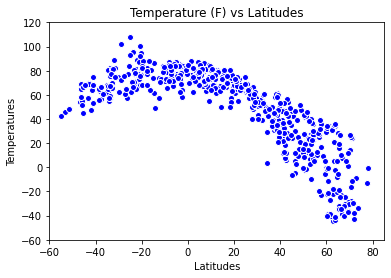

In [89]:
plt.scatter(city_lat, city_temps_f, marker="o", facecolors="blue", edgecolors="white")

plt.xlim(-60, 85)
plt.ylim(-60, 120)
plt.title("Temperature (F) vs Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Temperatures")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

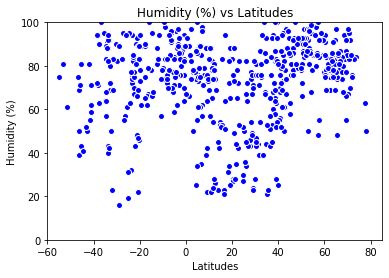

In [93]:
plt.scatter(city_lat, city_humidity, marker="o", facecolors="blue", edgecolors="white")

plt.xlim(-60, 85)
plt.ylim(0, 100)
plt.title("Humidity (%) vs Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

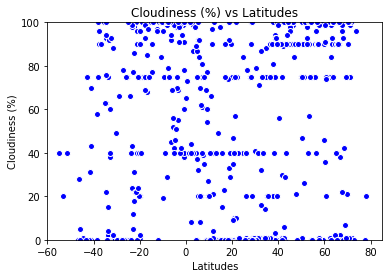

In [94]:
plt.scatter(city_lat, city_cloudiness, marker="o", facecolors="blue", edgecolors="white")

plt.xlim(-60, 85)
plt.ylim(0, 100)
plt.title("Cloudiness (%) vs Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind (mph)')

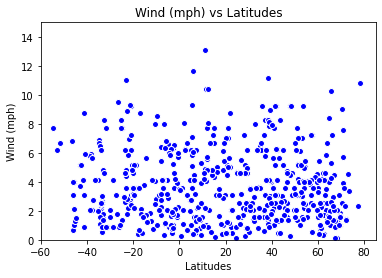

In [98]:
plt.scatter(city_lat, city_wind, marker="o", facecolors="blue", edgecolors="white")

plt.xlim(-60, 85)
plt.ylim(0, 15)
plt.title("Wind (mph) vs Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Wind (mph)")

## Linear Regression

In [121]:
northern_hemi_df=city_df[city_df["Latitude"]>0]
southern_hemi_df=city_df[city_df["Latitude"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (F)')

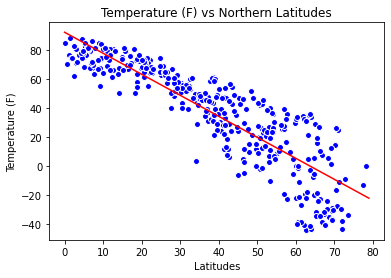

In [190]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Temperature (F)"], marker="o", facecolors="blue", edgecolors="white")

x_values=northern_hemi_df["Latitude"]
y_values=northern_hemi_df["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(0, 80, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Temperature (F) vs Northern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Temperature (F)")




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (F)')

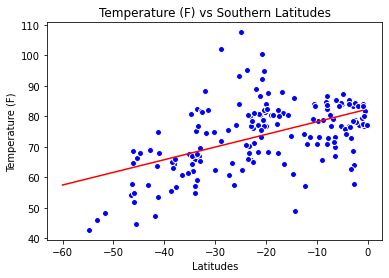

In [191]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Temperature (F)"], marker="o", facecolors="blue", edgecolors="white")

x_values=southern_hemi_df["Latitude"]
y_values=southern_hemi_df["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(-60, 0, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Temperature (F) vs Southern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Temperature (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Humidtiy (%)')

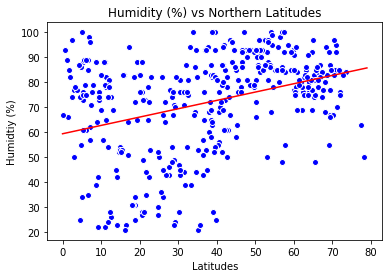

In [192]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"], marker="o", facecolors="blue", edgecolors="white")

x_values=northern_hemi_df["Latitude"]
y_values=northern_hemi_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(0, 80, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Humidity (%) vs Northern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Humidtiy (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Humidtiy (%)')

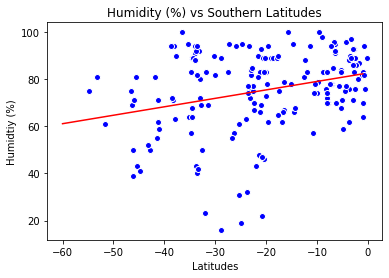

In [193]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"], marker="o", facecolors="blue", edgecolors="white")

x_values=southern_hemi_df["Latitude"]
y_values=southern_hemi_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(-60, 0, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Humidity (%) vs Southern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Humidtiy (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness (%)')

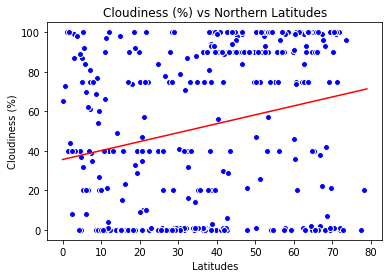

In [194]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"], marker="o", facecolors="blue", edgecolors="white")

x_values=northern_hemi_df["Latitude"]
y_values=northern_hemi_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(0, 80, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Cloudiness (%) vs Northern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

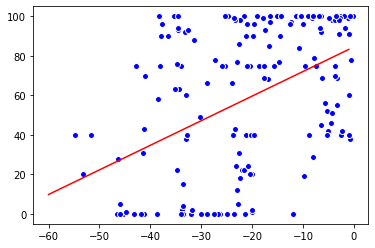

In [187]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"], marker="o", facecolors="blue", edgecolors="white")

x_values=southern_hemi_df["Latitude"]
y_values=southern_hemi_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(-60, 0, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Cloudiness (%) vs Southern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind (mph)')

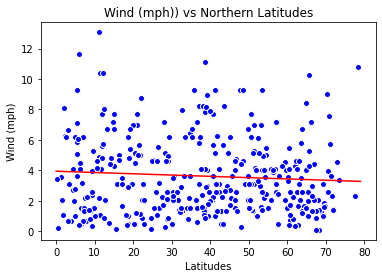

In [197]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Wind (mph)"], marker="o", facecolors="blue", edgecolors="white")

x_values=northern_hemi_df["Latitude"]
y_values=northern_hemi_df["Wind (mph)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(0, 80, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Wind (mph)) vs Northern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Wind (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind (mph)')

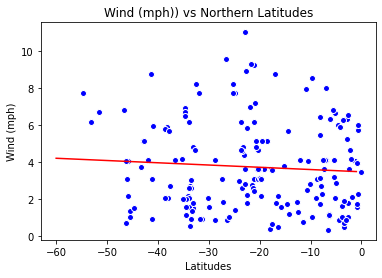

In [198]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Wind (mph)"], marker="o", facecolors="blue", edgecolors="white")

x_values=southern_hemi_df["Latitude"]
y_values=southern_hemi_df["Wind (mph)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)

x=np.arange(-60, 0, 1)
y=(x*slope)+intercept
plt.plot(x, y, c='r')

plt.title("Wind (mph)) vs Northern Latitudes")
plt.xlabel("Latitudes")
plt.ylabel("Wind (mph)")